In [2]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output, dash_table

In [15]:
df = pd.read_csv('hottest_50_1960_2022_new.csv')
df.head()

,date,title,artist,rank,last_week,peak,weeks,year,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres
0,1960-04-18,Running Bear,Johnny Preston,91,81,1,27,1960,0.610,0.688,...,-9.308,1.0,0.0357,0.573,0.000000,0.164,0.761,119.831,165893.0,['nashville sound']
1,1960-11-07,Finger Poppin' Time,Hank Ballard And The Midnighters,69,57,7,26,1960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,1960-02-15,Mack The Knife,Bobby Darin,76,59,1,26,1960,0.549,0.529,...,-12.291,0.0,0.1080,0.760,0.000000,0.206,0.464,82.755,184333.0,"['adult standards', 'brill building pop', 'eas..."
3,1960-05-30,Sweet Nothin's,Brenda Lee,63,32,4,24,1960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,1960-07-11,Sixteen Reasons,Connie Stevens,61,40,3,24,1960,0.339,0.406,...,-8.955,1.0,0.0319,0.865,0.000011,0.110,0.619,109.783,118133.0,['deep adult standards']


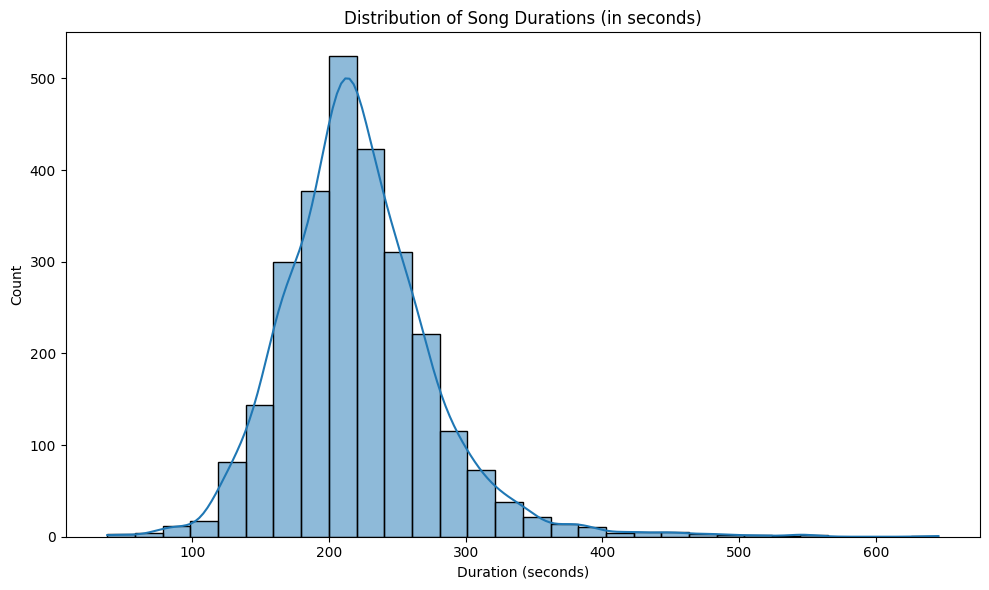

In [20]:
# Assuming you've loaded your DataFrame as df
# Convert duration from milliseconds to seconds
df['duration_sec'] = df['duration_ms'] / 1000

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_sec'].dropna(), kde=True, color='#1f77b4', alpha=0.5, bins=30)
plt.title('Distribution of Song Durations (in seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


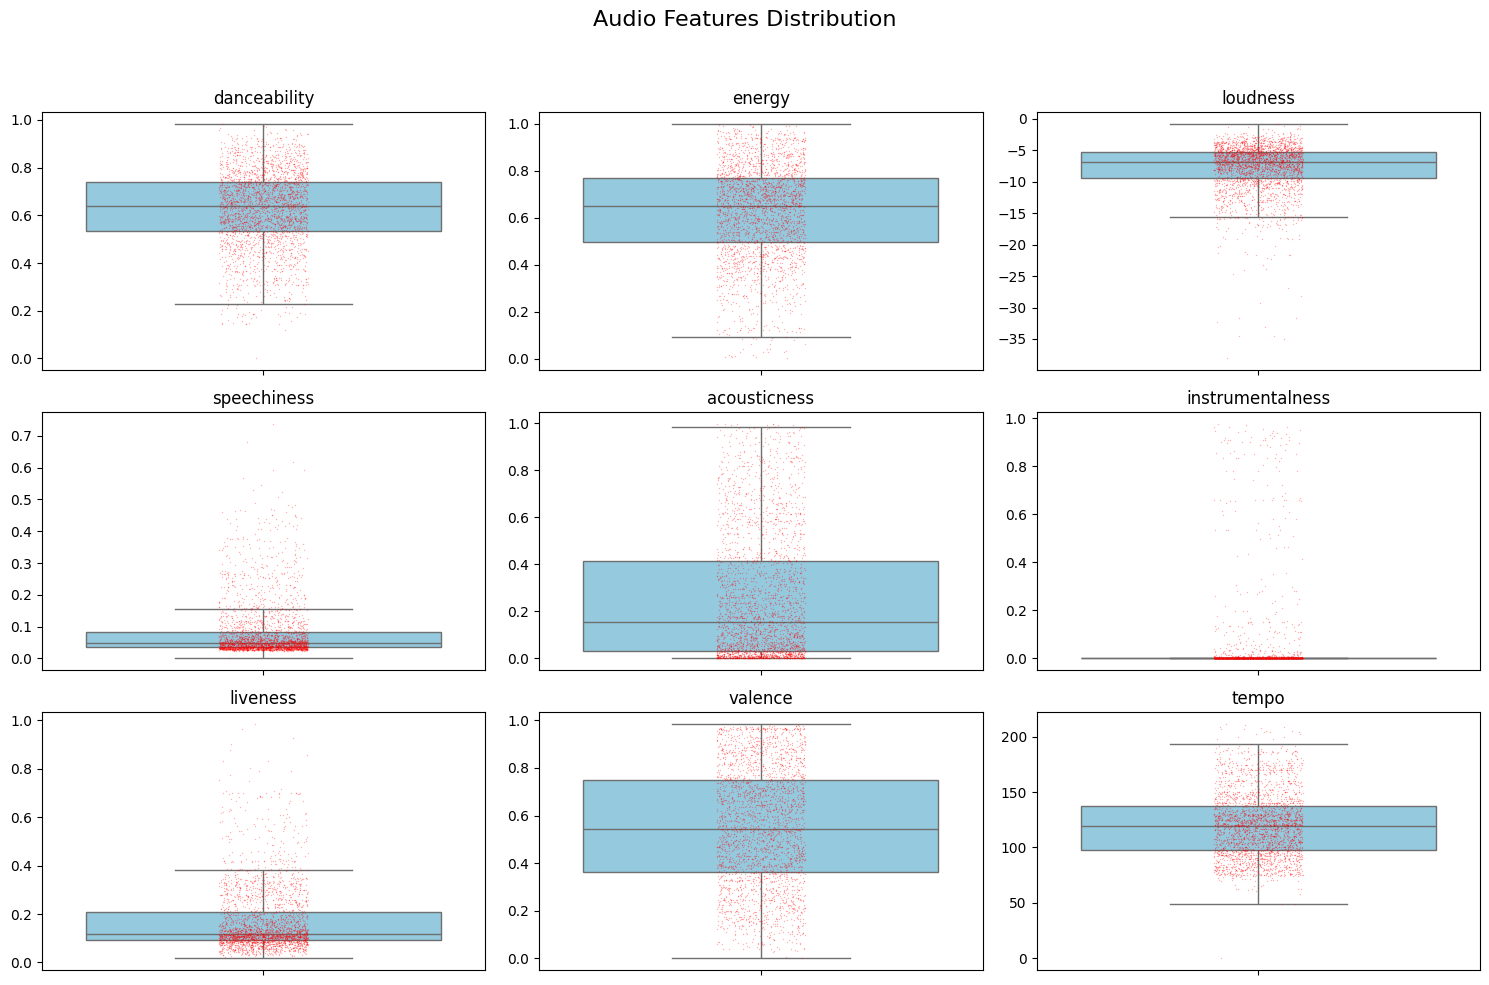

In [21]:
# Features to plot
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Set up grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Audio Features Distribution', fontsize=16)

# Loop through features and axes
for feature, ax in zip(features, axes.flatten()):
    sns.boxplot(y=df[feature], ax=ax, color='skyblue', fliersize=0)
    sns.stripplot(y=df[feature], ax=ax, color='red', alpha=0.3, size=1)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap title
plt.show()

<Figure size 1200x800 with 0 Axes>

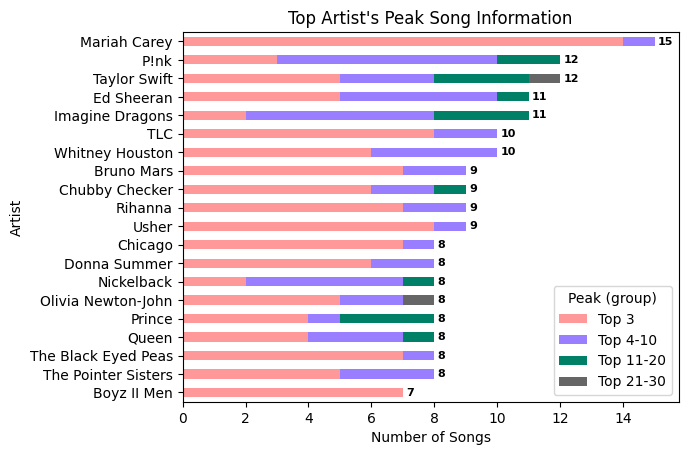

In [ ]:
# Load dataset (replace 'your_dataset.csv' with actual file path)
df = pd.read_csv('/content/hottest_50_1960_2022_new.csv')

# Filter out rows with missing 'artist' or 'peak' values
df = df.dropna(subset=['artist', 'peak'])

# Convert peak to numeric
df['peak'] = pd.to_numeric(df['peak'], errors='coerce')

# Define peak categories in order
def categorize_peak(peak):
    if peak <= 3:
        return 'Top 3'
    elif peak <= 10:
        return 'Top 4-10'
    elif peak <= 20:
        return 'Top 11-20'
    elif peak <= 30:
        return 'Top 21-30'
    else:
        return None

df['peak_category'] = df['peak'].apply(categorize_peak)

# Count the number of songs per artist in each peak category
artist_peak_counts = df.groupby(['artist', 'peak_category']).size().unstack(fill_value=0)

# Reorder columns
artist_peak_counts = artist_peak_counts[['Top 3', 'Top 4-10', 'Top 11-20', 'Top 21-30']]

# Calculate total songs per artist
artist_peak_counts['Total'] = artist_peak_counts.sum(axis=1)

# Select top 20 artists by total number of ranked songs
top_artists = artist_peak_counts['Total'].nlargest(20).index
top_artist_data = artist_peak_counts.loc[top_artists]

# Define colors for categories
colors = {"Top 3": "#FF9999", "Top 4-10": "#997FFF", "Top 11-20": "#008066", "Top 21-30": "#666666"}

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
ax = top_artist_data.drop(columns=['Total']).plot(kind='barh', stacked=True, color=[colors[col] for col in top_artist_data.columns if col != 'Total'])

# Add text labels for each category count and total at the end
for i, (index, row) in enumerate(top_artist_data.iterrows()):
    total = row['Total']
    x_offset = total + 0.1  # Position text slightly after the bar
    plt.text(x_offset, i, str(total), va='center', color='black', fontsize=8, fontweight='bold')

plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.title("Top Artist's Peak Song Information")
plt.legend(title="Peak (group)")
plt.gca().invert_yaxis()
plt.show()

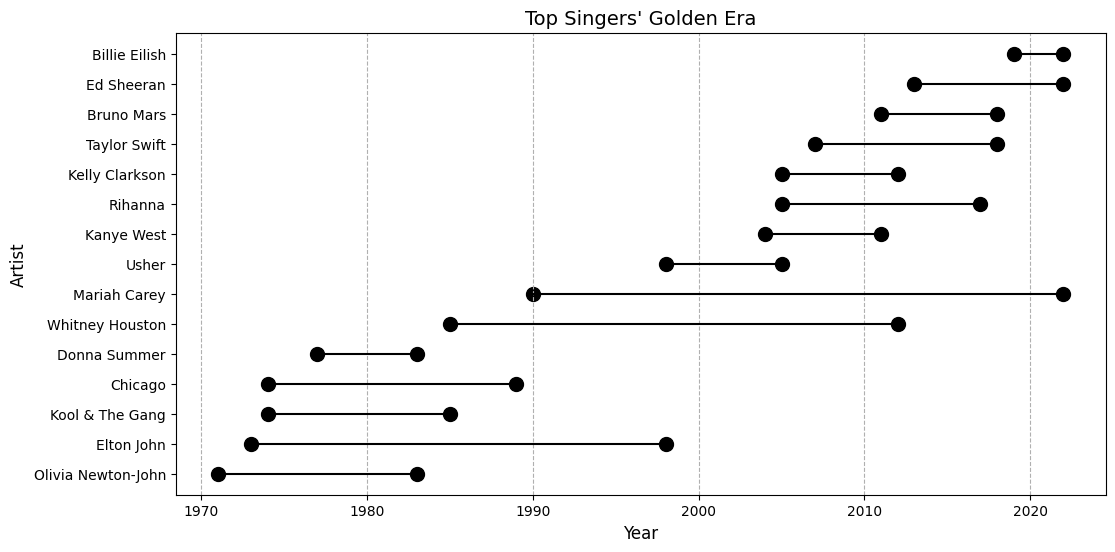

In [ ]:
# Load dataset (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('/content/hottest_50_1960_2022_new.csv')

# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# List of artists from the image
selected_artists = [
    "Bruno Mars", "Chicago", "Daryl Hall & John Oates", "Donna Summer", "Ed Sheeran",
    "Elton John", "Kelly Clarkson", "Kool & The Gang", "Mariah Carey", "Olivia Newton-John",
    "Rihanna", "Taylor Swift", "Usher", "Whitney Houston", "Billie Eilish",  "Kanye West"
]

# Filter dataset to include only selected artists
df = df[df['artist'].isin(selected_artists)]

# Identify golden era: Years where each artist peaked
artist_era = df.groupby('artist').agg(start_year=('year', 'min'), end_year=('year', 'max'))

# Sort artists by start year
artist_era = artist_era.sort_values(by='start_year', ascending=True)

# Plot settings
plt.figure(figsize=(12, 6))

# Draw horizontal lines and scatter points
for i, (artist, row) in enumerate(artist_era.iterrows()):
    plt.plot([row['start_year'], row['end_year']], [i, i], color='black', linewidth=1.5)
    plt.scatter([row['start_year'], row['end_year']], [i, i], color='black', s=100)

# Customize plot
plt.yticks(range(len(artist_era)), artist_era.index, fontsize=10, color='black')
plt.xticks(fontsize=10, color='black')
plt.ylabel('Artist', fontsize=12, color='black')
plt.xlabel('Year', fontsize=12, color='black')
plt.title("Top Singers' Golden Era", fontsize=14, color='black')
plt.grid(axis='x', linestyle='--')

# Show the plot
plt.show()


In [ ]:
# Load the CSV file
file_path = "/content/sankey.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Get unique artists and keys (ensure keys are sorted in ascending order)
artists = df["artist"].unique().tolist()
keys = sorted(df["key"].unique().tolist(), key=int)

# Create labels list (artists + sorted keys)
labels = artists + [str(k) for k in keys]

# Define RGBA colors for artists (opaque)
artist_colors = [
    "rgba(128, 0, 128, 1)",   # Purple
    "rgba(0, 128, 0, 1)",     # Green
    "rgba(0, 0, 255, 1)",     # Blue
    "rgba(255, 192, 203, 1)", # Pink
    "rgba(255, 0, 0, 1)",     # Red
    "rgba(144, 238, 144, 1)"  # Light green
]

# Generate grayscale colors for keys from brightest (0) to darkest (10)
num_keys = len(keys)
key_colors = [f"rgba({220 - i*17}, {220 - i*17}, {220 - i*17}, 1)" for i in range(num_keys)]

# Assign colors: artists get unique colors, keys get dynamically generated grays
node_colors = artist_colors[:len(artists)] + key_colors

# Map artists and keys to indices, ensuring keys are placed from top (0) to bottom (10)
artist_to_index = {artist: i for i, artist in enumerate(artists)}
key_to_index = {key: i + len(artists) for i, key in enumerate(keys)}

# Create source, target, and value lists
source = [artist_to_index[row["artist"]] for _, row in df.iterrows()]
target = [key_to_index[row["key"]] for _, row in df.iterrows()]
values = df["count"].tolist()

# Generate transparent link colors (match node color but with alpha = 0.4)
link_colors = [node_colors[s].replace(", 1)", ", 0.4)") for s in source]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",  # Helps maintain correct order (optional)
    node=dict(
        pad=10,
        thickness=50,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=link_colors
    )
))

# Update layout
fig.update_layout(
    title_text="Top Artists' Musical Preference",
    font_size=12,
    # paper_bgcolor="black",
    font_color="black"
)

fig.show()


In [14]:
# Load dataset
df = pd.read_csv("/content/hot100_all_1960_2022.csv")
df['date'] = pd.to_datetime(df['date'])

# Initialize app
app = dash.Dash(__name__)
artists = sorted(df["artist"].dropna().unique())

# App Layout
app.layout = html.Div(style={'backgroundColor': 'white', 'color': 'black', 'padding': '20px'}, children=[
    html.H1("Case Study: Music Rankings", style={'color': '#1f77b4', 'textAlign': 'center'}),

    html.Div([
        html.Label("Select Artist:", style={'color': 'black'}),
        dcc.Dropdown(
            id='artist-dropdown',
            options=[{'label': artist, 'value': artist} for artist in artists],
            placeholder="Select an artist",
            style={'backgroundColor': 'white', 'color': 'black'}
        )
    ], style={'width': '50%', 'margin': 'auto'}),

    html.Div([
        html.Div([
            html.H3("Top 6 Ranking Songs", style={'color': 'black'}),
            dash_table.DataTable(
                id='top-songs-table',
                columns=[
                    {'name': 'Title', 'id': 'title'},
                    {'name': 'Peak Rank', 'id': 'peak'}
                ],
                style_table={'width': '100%', 'border': 'none', 'backgroundColor': 'white'},
                style_header={'backgroundColor': '#1f77b4', 'color': 'white'},
                style_data={'backgroundColor': 'white', 'color': 'black'}
            ),
        ], style={'width': '40%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3("Best Rank:", style={'color': 'black'}),
            html.H2(id='best-rank', style={'color': '#1f77b4'}),
            html.H3("Songs on Board:", style={'color': 'black'}),
            html.H2(id='songs-on-board', style={'color': '#1f77b4'}),
            html.H3("Longest Lasting Week:", style={'color': 'black'}),
            html.H2(id='longest-week', style={'color': '#1f77b4'}),
        ], style={'width': '40%', 'display': 'inline-block', 'verticalAlign': 'top', 'paddingLeft': '5%'}),
    ], style={'display': 'flex', 'justifyContent': 'center'}),

    html.Div([
        html.H3("Rank History", style={'color': 'black', 'textAlign': 'center'}),
        dcc.Graph(id='rank-history-graph')
    ], style={'width': '80%', 'margin': 'auto'}),

    html.Div([
        html.H3("Top Lasting Songs on Billboard", style={'color': 'black'}),
        dcc.Graph(id='lasting-songs-bar')
    ], style={'width': '80%', 'margin': 'auto'}),
])

# Callback to update dashboard
@app.callback(
    [Output('top-songs-table', 'data'),
     Output('best-rank', 'children'),
     Output('songs-on-board', 'children'),
     Output('longest-week', 'children'),
     Output('rank-history-graph', 'figure'),
     Output('lasting-songs-bar', 'figure')],
    [Input('artist-dropdown', 'value')]
)
def update_dashboard(selected_artist):
    if not selected_artist:
        return [], "N/A", "N/A", "N/A", go.Figure(), go.Figure()

    filtered_df = df[df['artist'].str.contains(selected_artist, case=False, na=False)]

    if filtered_df.empty:
        return [], "N/A", "N/A", "N/A", go.Figure(), go.Figure()

    filtered_df_unique = filtered_df.drop_duplicates(subset=['title'])
    top_songs_df = filtered_df_unique.sort_values('peak').head(6)
    top_songs = top_songs_df[['title', 'peak']].to_dict('records')

    # Key Metrics
    best_rank = filtered_df['peak'].min()
    songs_on_board = filtered_df['title'].nunique()
    longest_week = filtered_df['weeks'].max()

    # Colors and line styles for top 6 songs
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Plotly default color cycle
    line_styles = ['solid', 'dash', 'dot', 'dashdot', 'longdash', 'longdashdot']

    # Rank History Chart (only top 6 songs)
    rank_fig = go.Figure()
    for idx, row in top_songs_df.reset_index(drop=True).iterrows():
        song = row['title']
        song_data = filtered_df[filtered_df['title'] == song].sort_values('date')

        rank_fig.add_trace(go.Scatter(
            x=song_data['date'],
            y=song_data['peak'],
            mode='lines+markers',
            name=song,
            line=dict(color=colors[idx], dash=line_styles[idx])
        ))

    rank_fig.update_layout(
        title="Rank History",
        xaxis_title="Date",
        yaxis_title="Rank",
        yaxis=dict(
            autorange="reversed",
            showline=True,
            linewidth=1,
            linecolor='black',
            gridcolor='lightgray'
        ),
        xaxis=dict(
            showline=True,
            linewidth=1,
            linecolor='black',
            gridcolor='lightgray'
        ),
        paper_bgcolor='white',
        plot_bgcolor='white',
        font_color='black'
    )

    # Lasting Songs Chart
    lasting_songs = filtered_df.groupby('title')['weeks'].max().reset_index()
    lasting_songs = lasting_songs.sort_values('weeks', ascending=False).head(9)

    bar_fig = go.Figure(go.Bar(
        y=lasting_songs['title'],
        x=lasting_songs['weeks'],
        orientation='h',
        marker=dict(color='#1f77b4')
    ))
    bar_fig.update_layout(
        title="Top Lasting Songs on Billboard",
        xaxis_title="Weeks",
        yaxis_title="Title",
        xaxis=dict(
            showline=True,
            linewidth=1,
            linecolor='black',
            gridcolor='lightgray'
        ),
        yaxis=dict(
            showline=True,
            linewidth=1,
            linecolor='black',
            gridcolor='lightgray'
        ),
        paper_bgcolor='white',
        plot_bgcolor='white',
        font_color='black'
    )

    return top_songs, best_rank, songs_on_board, longest_week, rank_fig, bar_fig

# Run app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>